In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sdf
import re
import glob
import h5py
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10, 8)

In [13]:
DATA_DIR = "2run"
ALL_FILES = glob.glob(f"{DATA_DIR}/*sdf")
ALL_FILES.sort()
POINTS = len(ALL_FILES)

In [14]:
EXTENT = [-10,10, -10, 10]

In [20]:
raw_data = sdf.read(ALL_FILES[0], dict=True)

In [22]:
raw_data.keys()

dict_keys(['Header', 'Run_info', 'Wall-time', 'Electric Field/Ex', 'Electric Field/Ey', 'Electric Field/Ez', 'Derived/Number_Density', 'Derived/Number_Density/Electron', 'Grid/Grid', 'Grid/Grid_mid', 'Grid/CPUs/Original rank', 'Grid/CPUs/Original rank_mid', 'CPUs/Original rank', 'CPUs/Current rank'])

In [16]:
lambd = 1e-6
c = 3e8
omega = 2*np.pi*c/lambd
n_c = omega*omega/(4*np.pi*np.pi*81)

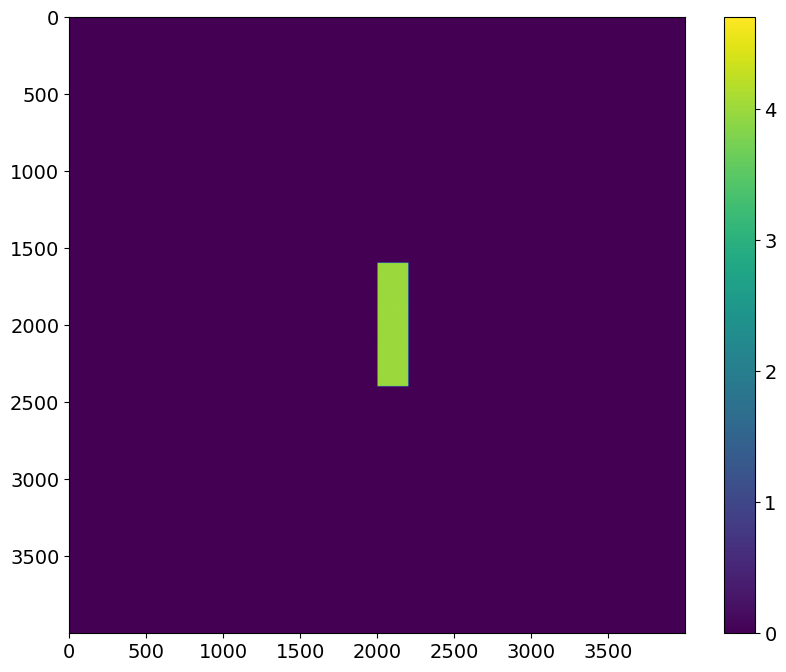

In [17]:
plt.imshow(raw_data.Derived_Number_Density_Electron.data.T/n_c)
plt.colorbar()

In [7]:
def plot_field(data_dir, ax, component="y"):
    raw_data = sdf.read(data_dir)
    comp = {
        "x":raw_data.Electric_Field_Ex,
        "y":raw_data.Electric_Field_Ey,
        "z":raw_data.Electric_Field_Ez,
    }
    field = comp[component].data.T
    t = raw_data.Header['time']*1e15
    field = field/(field.max()+1e-10)
    ax.imshow(field**2, cmap='jet', origin='lower',
    extent=EXTENT,
    aspect='auto',
    )
    ax.set_xlabel('$x \, [\mu m]$')
    ax.set_ylabel('$y \, [\mu m]$')
    ax.set_title(f't = {t:.1f} fs')

In [8]:
def get_field(id, component):
    raw_data = sdf.read(ALL_FILES[id])
    comp = {
        "x":raw_data.Electric_Field_Ex,
        "y":raw_data.Electric_Field_Ey,
        "z":raw_data.Electric_Field_Ez,
    }
    field = comp[component].data.T
    return field

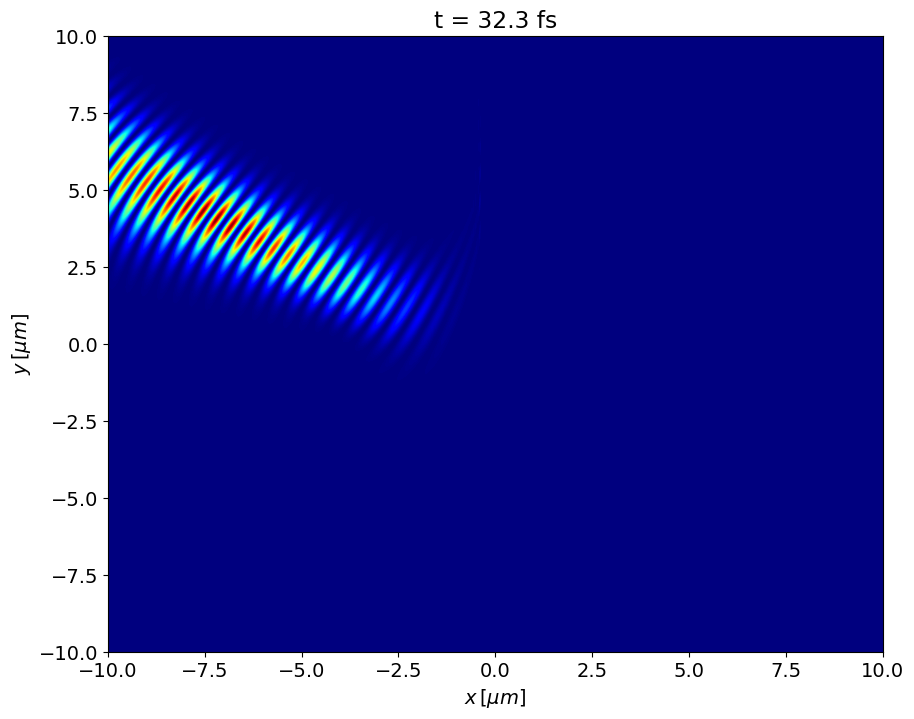

In [9]:
plot_field(ALL_FILES[-10], plt.gca(), component="y")

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(25, 22))
ax = ax.flatten()
i = 0
for dir in ALL_FILES[:-8]:
    plot_field(dir, ax[i], component="y")
    i += 1
    if i == 8:
        break

KeyboardInterrupt: 